In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

In [2]:
# Utility function 
# Will be used to set xlabels, ylabels, and the title of the plots 

def set_labels(x_label: str, y_label: str, plot_title: str) -> None:
    plt.title(plot_title) 
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [3]:
# Loading the dataset 
dataset = pd.read_csv("Datasets/airbnb_train.csv")
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1. Inspecting the Data

In [4]:
# Get the shape of the data
dataset.shape

(48895, 16)

In [5]:
# Look at the datatypes in the datasets 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Summary Staticstics 
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
columns = dataset.columns
columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### 2. Data Cleaning
- Handling the missing values 
- Removing any duplicates

In [8]:
# checking for missing values 
(dataset.isnull().sum() / dataset.shape[0]) * 100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

- Most of the missing values are insignificant. 
- However, 20% of the data is missing for "last_review" and "reviews_per_month" variables

In [9]:
# Checking if the data has duplicated rows
dataset.duplicated().sum()

0

- The data has no duplicated rows

<Axes: ylabel='price'>

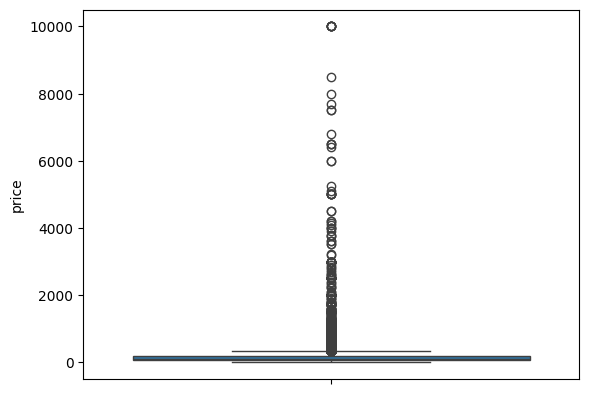

In [10]:
# Detecting the outliers using BoxPlots 
sns.boxplot(y=dataset.price)

### 3. Visualization 
#####   i). The number of AirBnBs per neighbourhood group 


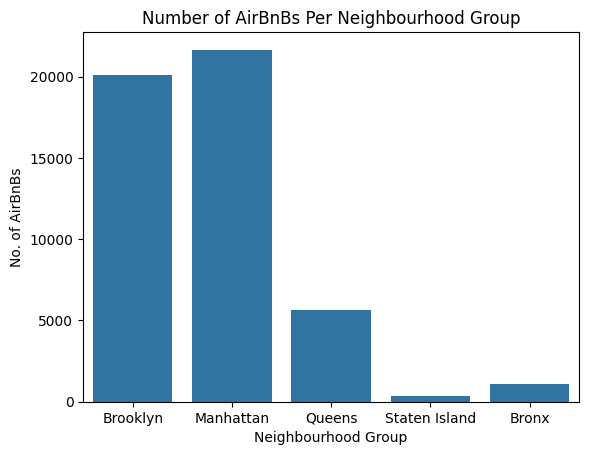

In [11]:
sns.countplot(dataset, x="neighbourhood_group") 
set_labels("Neighbourhood Group", "No. of AirBnBs", "Number of AirBnBs Per Neighbourhood Group")

- The countplot reveals that Manhattan has the highest number of AirBnBs closely followed by Brooklyn (The two groups are a hub for business and tourists attacting a higher number of AirBnBs). 
- Staten Island and Bronx have the least number of AirBnBs. 

##### ii). Distribution of Prices by Neighbourhood Groups

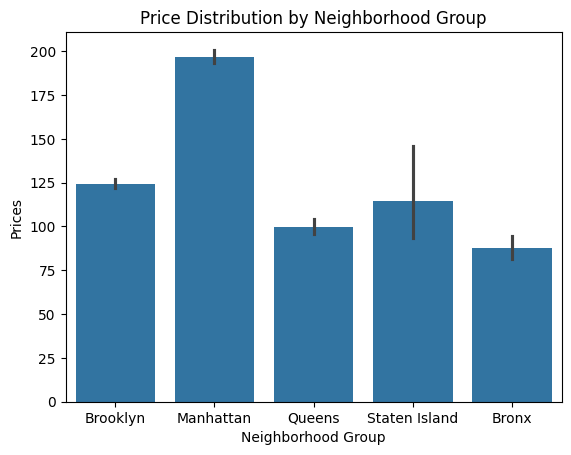

In [12]:
sns.barplot(dataset, x="neighbourhood_group", y="price") 
set_labels("Neighborhood Group", "Prices", "Price Distribution by Neighborhood Group")

- The barplot reveals that Manhattan has the most expensive AirBnBs with neighbourhoods like Queens and Bronx having the cheapest AirBnBs in that order.
- We can also get to see how the prices are distributed wrt to room types as shown below

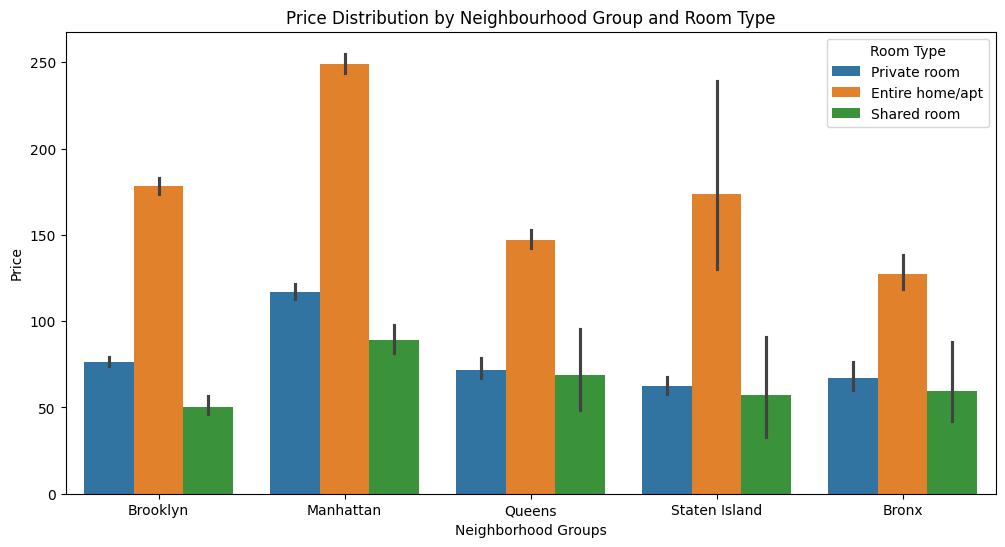

In [13]:
fig = plt.figure(figsize=(12,6)) # Setting the size of the plot

sns.barplot(dataset, x="neighbourhood_group", y="price", hue="room_type")
set_labels("Neighborhood Groups", "Price", "Price Distribution by Neighbourhood Group and Room Type")
plt.legend(title="Room Type")

- It appears that all the rooms types in Manhattan are expensive than all other groups. 
- Accross the neighbourhood groups, Entire home/apt are most expensive. This is mostly because they are sizeable compared to rooms. 

##### iii). Customer Preferrence Based on Room Type 
- Which room types did the customer consider?

In [14]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


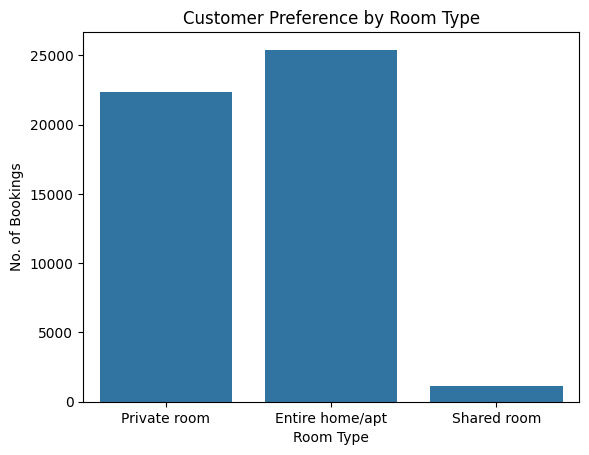

In [15]:
sns.countplot(dataset, x="room_type")
set_labels("Room Type", "No. of Bookings", "Customer Preference by Room Type")

- Most of the customers preferred Entire Home or Appartment (with approx 25K bookings) or Private Rooms (with approx 22K bookings). Tourists gave less preferrence to shared rooms. This may mostly be because most tourists were travelling alone and preferred privacy. As a result, they considered either private rooms or entire home.

##### iv). Seasonality of Tourist Activities 

In [16]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
# Lets making sure that the "last_review" is of pd.Date dtype only
dataset.last_review = pd.to_datetime(dataset.last_review)

# Estracting the month from date column 
dataset["month_of_review"] = dataset.last_review.dt.strftime("%B")

In [18]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,October
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,May
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,July
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,November


In [19]:

dataset.month_of_review.unique()

array(['October', 'May', nan, 'July', 'November', 'June', 'December',
       'January', 'August', 'April', 'September', 'March', 'February'],
      dtype=object)

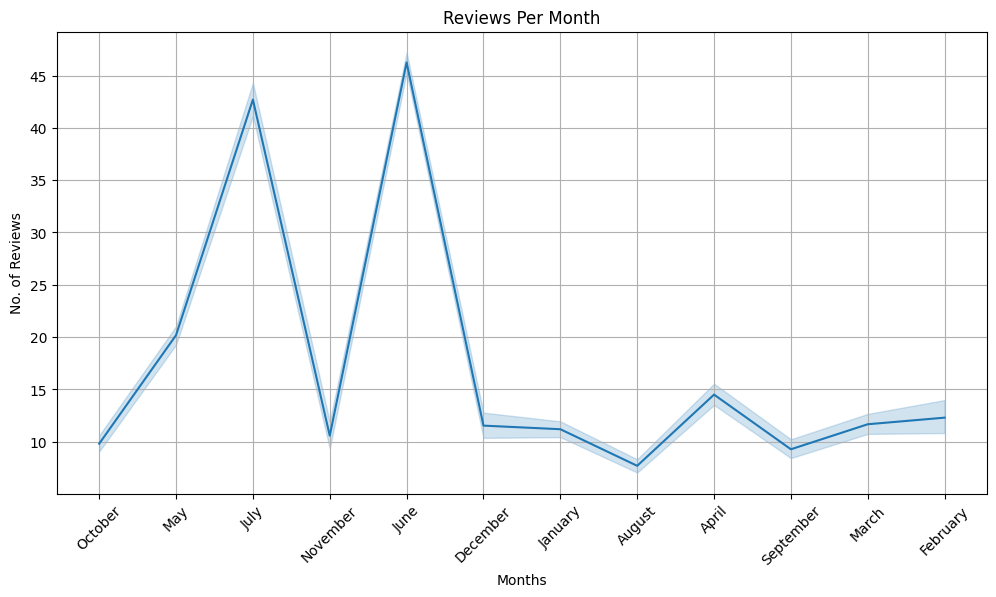

In [20]:
fig = plt.figure(figsize=(12,6))

sns.lineplot(dataset, x="month_of_review", y="number_of_reviews")
plt.xticks(rotation=45)
plt.grid(True)
set_labels("Months", "No. of Reviews", "Reviews Per Month")

- From the plot above, it is very hard to read the seasonality of our data since the months axis is not ordered from 'January' to "December". 
- So, we shall convert our new column "month_of_review" as categorical column as illustrated below.

In [21]:
# Defining the correct order of the months
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Converting the "month_of_review" to categorical column 
dataset.month_of_review = pd.Categorical(dataset.month_of_review, categories=months_order, ordered=True)


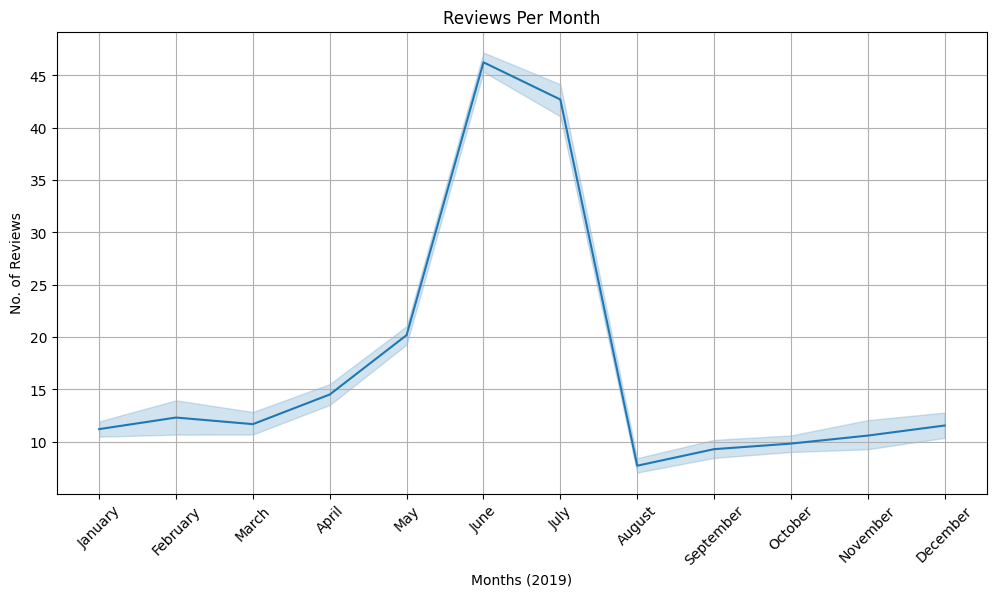

In [22]:
# Now ploting 
fig = plt.figure(figsize=(12,6))

sns.lineplot(dataset, x="month_of_review", y="number_of_reviews")
plt.xticks(rotation=45)
plt.grid(True)
set_labels("Months (2019)", "No. of Reviews", "Reviews Per Month")

**Seasonality**
- The period June and July recorded the highest number of reviews per month. This means that most of the tourists travelled during this time. 
- The period is also ideal for vacations in many regions hence the high number of AirBnB usage. 
- Also, most of the vacations end towards end end of July and approaching August, hence the declining number of reviews in August.

We can also use the word cloud to visualize the catch phrases used by  most AirBnB owners 

In [24]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,month_of_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,October
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,May
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,July
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,November


### v.) Word Cloud
- Using the wordcloud to identify the most prominent names or phrases used by hosts to name thier AirBnBs

(-0.5, 399.5, 399.5, -0.5)

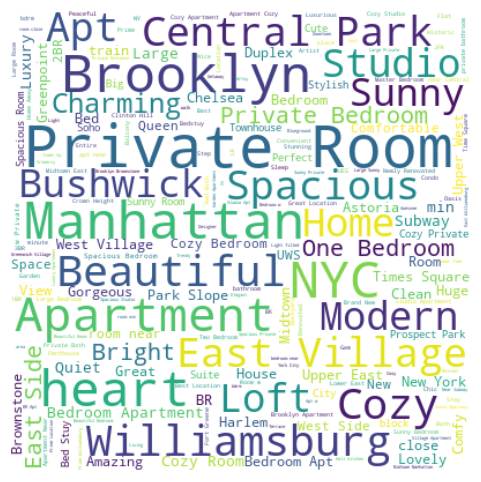

In [31]:

# Combining all texts into a single string
words = " ".join(str(text) for text in dataset.name)

# Generating the word cloud
word_cloud = WordCloud(width=400, height=400, background_color="white").generate(words) 

# Plotting the word cloud 
plt.figure(figsize=(6,6)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.axis("off")

In [ ]:
# To be Continued